# CAR PRICE PREDICTION

**Problem statement**

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. 

**Importing libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor




from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

**Loading dataset**

In [2]:
#Reading the Dataset:
cpp = pd.read_csv(r'D:\flip WS\Car-Price-Prediction\Car Price Prediction\Car_dataset.csv')

In [3]:
cpp.head() #checking 5 rows

Unnamed: 0                       cars      price   Year  kilometer  \
0           0                Honda Civic  15,25,000  2,019  47,000 km   
1           1  Mercedes-Benz New C-Class  27,90,000  2,017  62,460 km   
2           2                Hyundai i20   7,41,975  2,021       1 km   
3           3                  Tata Nano     35,000  2,012  90,000 km   
4           4              Honda City ZX   1,10,000  2,008  90,000 km   

          location  Unnamed: 6 rs  
0      Ashok Vihar         NaN  ₹  
1   Rajouri Garden         NaN  ₹  
2     Shakti Nagar         NaN  ₹  
3       Chand Bagh         NaN  ₹  
4  Rohini Sector 2         NaN  ₹

In [4]:
cpp.columns # name of columns

Index(['Unnamed: 0', 'cars', 'price', 'Year', 'kilometer', 'location',
       'Unnamed: 6', 'rs'],
      dtype='object')

In [5]:
#Checking the info() method to get an a general idea about our data
cpp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5157 non-null   int64  
 1   cars        5157 non-null   object 
 2   price       5157 non-null   object 
 3   Year        5157 non-null   object 
 4   kilometer   5157 non-null   object 
 5   location    5157 non-null   object 
 6   Unnamed: 6  0 non-null      float64
 7   rs          5157 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 322.4+ KB


In [6]:
#Lets check the null values if any
cpp.isnull().sum()

Unnamed: 0       0
cars             0
price            0
Year             0
kilometer        0
location         0
Unnamed: 6    5157
rs               0
dtype: int64

There are 5157 null values present in the column 'unnamed: 6'

In [7]:
#shape of dataset
cpp.shape

(5157, 8)

There are **5157** rows and **8** columns

In [8]:
# Dropping those features which are not adding any important information...
cpp.drop(['Unnamed: 0','Unnamed: 6','rs'],axis=1,inplace=True)
cpp

cars      price   Year   kilometer  \
0                   Honda Civic  15,25,000  2,019   47,000 km   
1     Mercedes-Benz New C-Class  27,90,000  2,017   62,460 km   
2                   Hyundai i20   7,41,975  2,021        1 km   
3                     Tata Nano     35,000  2,012   90,000 km   
4                 Honda City ZX   1,10,000  2,008   90,000 km   
...                         ...        ...    ...         ...   
5152              Toyota Innova  51,50,000  2,011  130,000 km   
5153          Maruti Suzuki 800     65,000  1,992   55,555 km   
5154              Toyota Innova   2,25,000  2,008  125,439 km   
5155          Maruti Suzuki 800     35,000  1,997   68,749 km   
5156                Tata Safari   3,00,000  2,008   92,000 km   

                          location  
0                      Ashok Vihar  
1                   Rajouri Garden  
2                     Shakti Nagar  
3                       Chand Bagh  
4                  Rohini Sector 2  
...                            ...  
5152                    Model Town  
5153                      Ludhiana  
5154             Gurunanak Mohalla  
5155  Guru Teg Bahadur Singh Nagar  
5156                    Model Town  

[5157 rows x 5 columns]

In [9]:
#Lets re-check the null values if any
cpp.isnull().sum()

cars         0
price        0
Year         0
kilometer    0
location     0
dtype: int64

Now there are no null values present.

<AxesSubplot:>

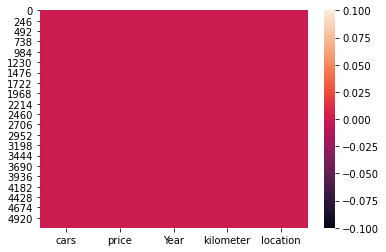

In [10]:
#ploting the heatmap for null values , visualizing

sns.heatmap(cpp.isnull())

We didnt fond any null values in the dataset. Hence, we can proceed towards visualizing our data

In [11]:
cpp.nunique()

cars          316
price         750
Year           35
kilometer    1304
location     1181
dtype: int64

**Value Count function**

In [12]:
cpp['price'].value_counts()

4,50,000     93
5,25,000     77
2,25,000     67
4,75,000     65
3,25,000     65
             ..
6,48,000      1
17,20,000     1
3,78,600      1
1,77,000      1
1,79,500      1
Name: price, Length: 750, dtype: int64

In [13]:
cpp.columns

Index(['cars', 'price', 'Year', 'kilometer', 'location'], dtype='object')

In [14]:
cpp['kilometer'].value_counts()

70,000 km           139
80,000 km           115
65,000 km           114
90,000 km           114
60,000 km            94
                   ... 
120,637 km            1
55,085 km             1
2011 - 51,000 km      1
80,200 km             1
7,940 km              1
Name: kilometer, Length: 1304, dtype: int64

In [15]:
cpp['location'].value_counts()

Nungambakkam                   175
Chennai Central                170
Naranpura                      134
Navrangpura                    122
Vijay Nagar                    116
                              ... 
Surmangalam                      1
Kotla 171                        1
Lohgarh                          1
Sanver Road Industrial Area      1
Rohini Sector 8                  1
Name: location, Length: 1181, dtype: int64

In [16]:
cpp['cars'].value_counts()

Maruti Suzuki Swift          218
Maruti Suzuki Swift Dzire    191
Honda City                   170
Hyundai i10                  165
Toyota Innova                147
                            ... 
Mahindra Jeep                  1
Ssangyong Rexton               1
Mercedes-Benz Cls              1
Rolls-Royce Phantom            1
Fiat Linea Classic             1
Name: cars, Length: 316, dtype: int64

In [17]:
cpp['Year'].value_counts()

2,016    480
2,013    473
2,012    463
2,017    452
2,011    445
2,015    435
2,014    427
2,018    421
2,010    294
2,019    236
2,009    227
2,008    180
2,007    138
2,020    118
2,021     91
2,006     77
2,005     49
2,004     45
2,003     39
2,001     14
2,002     11
1,999     10
2,000      8
1,997      6
1,998      5
1,995      3
1,996      2
1,987      1
1,990      1
1,983      1
208        1
1,988      1
1,989      1
1,992      1
1,959      1
Name: Year, dtype: int64

In [18]:
cpp.columns

Index(['cars', 'price', 'Year', 'kilometer', 'location'], dtype='object')

In [19]:
for i in cpp.columns:
    if cpp[i].dtypes==object:
        print(cpp[i].head(0))

Series([], Name: cars, dtype: object)
Series([], Name: price, dtype: object)
Series([], Name: Year, dtype: object)
Series([], Name: kilometer, dtype: object)
Series([], Name: location, dtype: object)


there are all object datatype, as its showing

In [20]:
for i in cpp.columns:
    if cpp[i].dtypes!=object:
        print(cpp[i].head(0))

there are no other datatype in the dataset

In [21]:
cpp.dtypes

cars         object
price        object
Year         object
kilometer    object
location     object
dtype: object

from data set it is easily understandable that(cars,price,Year,kilometer,location) all are object

# Data visulization(EDA analysis )

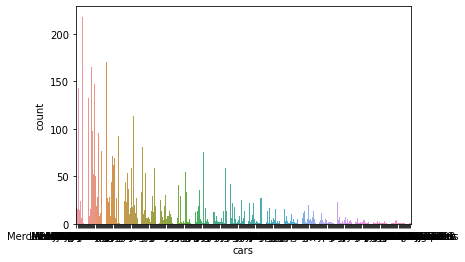

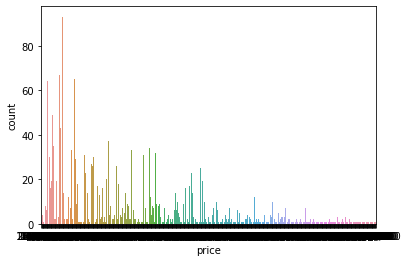

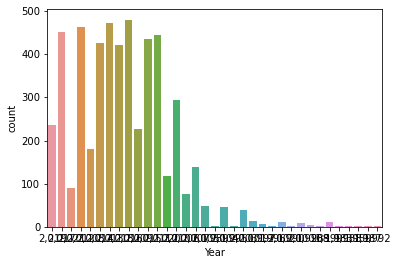

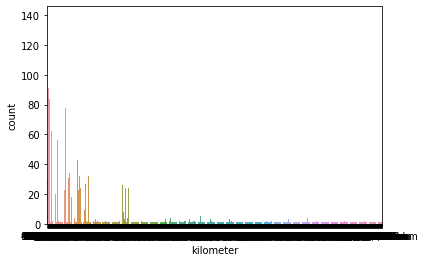

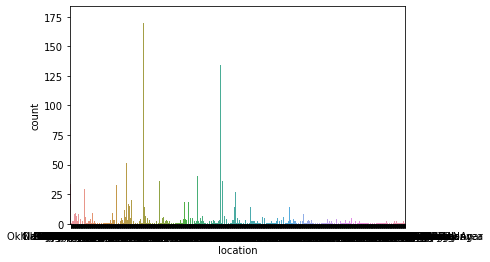

In [22]:
for i in cpp.columns:
    if cpp[i].dtypes=='object':
        sns.countplot(cpp[i])
        plt.show()

Data is left skewed and its not equally distributed

**we will go for Ordinal encoder now to convert object to numeric values**

In [23]:
#importing library for encoding and creating instance also

from sklearn.preprocessing import OrdinalEncoder
orde=OrdinalEncoder()

In [24]:
#Converting object datatype into float values

for i in cpp.columns:
    if cpp[i].dtypes=='object':
        cpp[i]=orde.fit_transform(cpp[i].values.reshape(-1,1))
cpp.head()

cars  price  Year  kilometer  location
0   73.0  164.0  31.0      653.0      67.0
1  212.0  323.0  29.0      879.0     855.0
2  103.0  640.0  33.0        5.0     984.0
3  271.0  421.0  24.0     1245.0     190.0
4   72.0    6.0  20.0     1245.0     892.0

All our columns with string values are now converted into float values.

In [25]:
#describing mean, median, min and max values of data

cpp.describe()

cars        price         Year    kilometer     location
count  5157.000000  5157.000000  5157.000000  5157.000000  5157.000000
mean    155.853597   381.254605    25.404499   721.018034   613.389761
std      81.907660   204.302943     4.185206   372.563477   341.728000
min       0.000000     0.000000     0.000000     0.000000     0.000000
25%      90.000000   224.000000    23.000000   435.000000   289.000000
50%     159.000000   383.000000    26.000000   756.000000   675.000000
75%     201.000000   543.000000    29.000000  1028.000000   904.000000
max     315.000000   749.000000    34.000000  1303.000000  1180.000000

Observations:

There are very high values in the kilometer column.

The standard deviation in few columns is very high, hence the data might be skewed.

Observing the min and max values, There is huge outliers in our data.

The values of data are widely scattered from low range to high range within the data, hence scaling data is very important.

In [26]:
cpp.corr()

cars     price      Year  kilometer  location
cars       1.000000  0.043050 -0.008261  -0.060732  0.020042
price      0.043050  1.000000  0.281768  -0.061000  0.022564
Year      -0.008261  0.281768  1.000000  -0.138861  0.018060
kilometer -0.060732 -0.061000 -0.138861   1.000000  0.011487
location   0.020042  0.022564  0.018060   0.011487  1.000000

<AxesSubplot:>

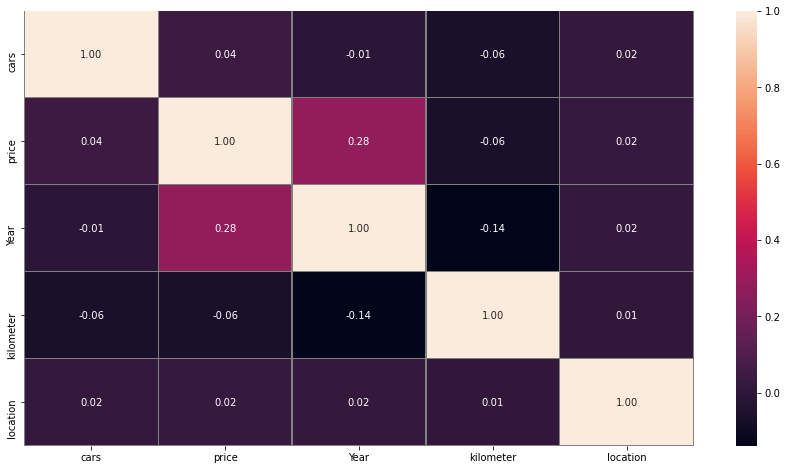

In [28]:
#plotting correlation through heatmap of input features with target varable

plt.figure(figsize=(15,8))
sns.heatmap(cpp.corr(),annot=True,linewidths=0.1,linecolor='grey',fmt='0.2f')

Observations:

The most positively correlated column with the target variale is price

The most negatively correalted column with the target variale is kilometer

Only two Columns are negatively Correlated with the Target Variable

In [27]:
corr_matrix=cpp.corr()

**Multi-Variaite Anlaysis**

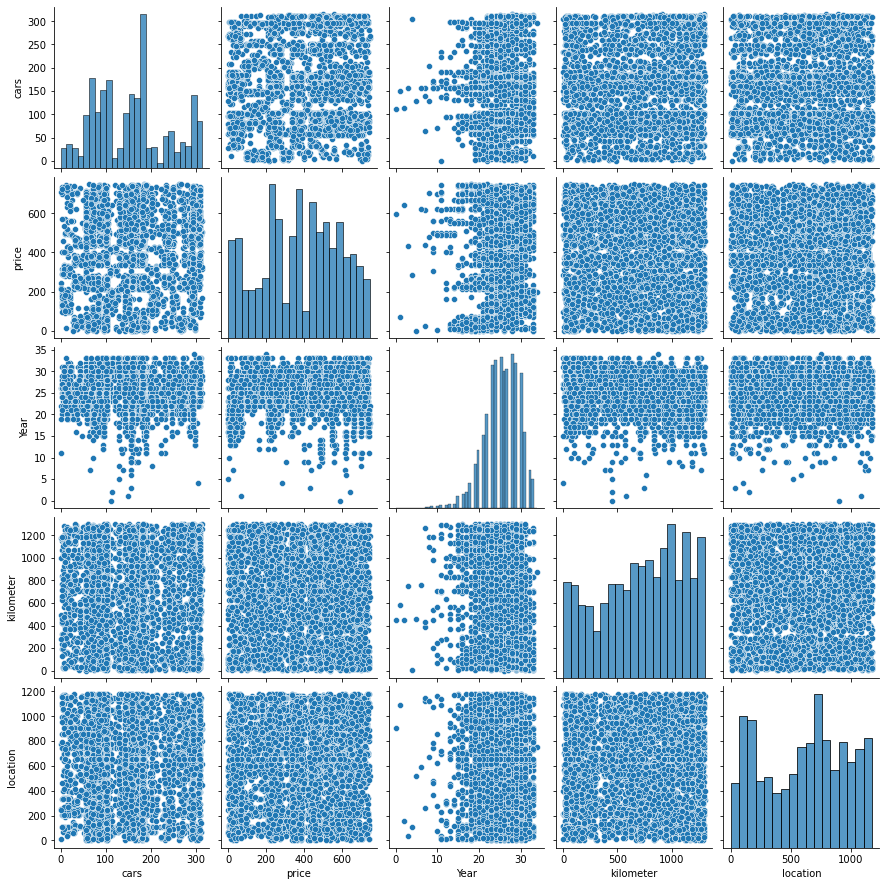

In [28]:
sns.pairplot(cpp)
plt.show()

**Checking Outlier using Boxplot**

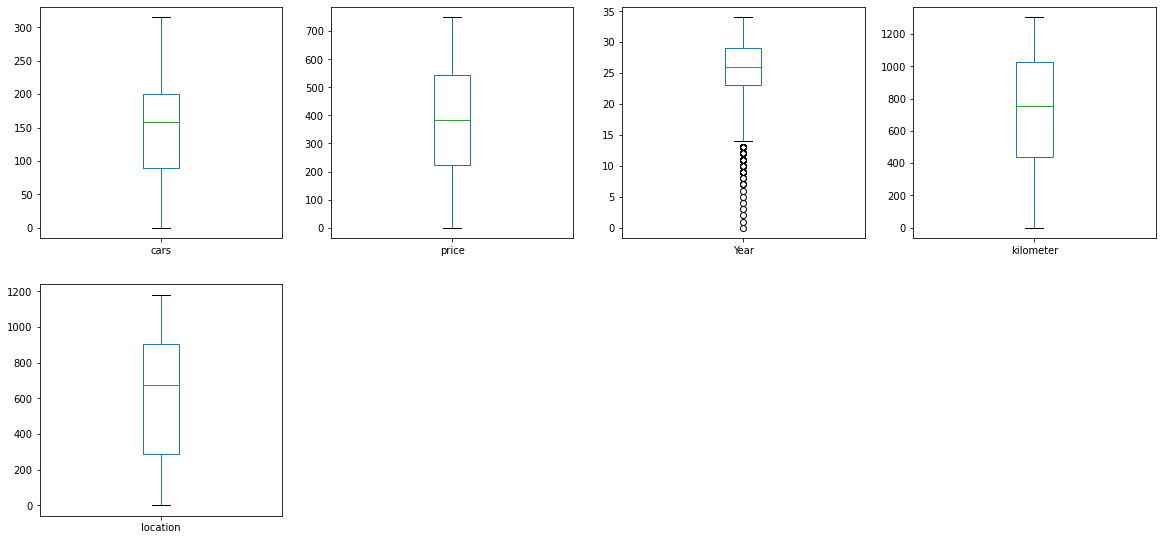

In [29]:
#ploting boxplot to check the outlier in the dataset

cpp.plot(kind='box',subplots=True,layout=(8,4),figsize=(20,40))
plt.show()

Observation:We found that Year column is having outlier it is important,so we can not remove outlier

**Removing Outliers**

In [30]:
# Z score technique

from scipy.stats import zscore
z=np.abs(zscore(cpp))

In [31]:
cpp_new=cpp[(z<3).all(axis=1)]
print(cpp.shape)
print(cpp_new.shape)

(5157, 5)
(5116, 5)


In [32]:
loss=((5157-5116)/5157)*100
loss

0.795035873569905

We observed that there are too many outliers present in the majority of our columns. We tried resolving these outliers, we loose 79.59% of data which is a huge data loss and we might miss out on very important information. we will not resolve these outliers and proceed forward.

**checking skewness**

In [33]:
cpp.skew()

cars         0.274267
price       -0.139956
Year        -0.804203
kilometer   -0.301345
location    -0.128429
dtype: float64

We found skewness and lets remove skewness after splitting data

# Data Preprocessing

**Spliting Independent(X) and target (Y) varaibles**

In [34]:
#Creating X and Y columns

X=cpp.drop('Year',axis=1)
y=cpp['Year']

In [35]:
#using power transform to remove skewness

from sklearn.preprocessing import power_transform
X=power_transform(X,method='yeo-johnson')
X

array([[-0.99404652, -1.03269102, -0.14983158, -1.73462944],
       [ 0.7225457 , -0.22045153,  0.44007914,  0.72180112],
       [-0.56603373,  1.21494317, -2.03211029,  1.04927024],
       ...,
       [ 1.55249544, -0.71457753, -1.65216284, -0.65141901],
       [ 0.09898406,  0.2425182 ,  0.69383573, -0.66081852],
       [ 1.35090135, -0.16254949,  1.4043987 ,  0.18497667]])

Skewness has been removed

In [36]:
#importing standard scale libry

from sklearn.preprocessing import StandardScaler

#scaling our data to improve model performance

ss=StandardScaler()
X=ss.fit_transform(X)
X

array([[-0.99404652, -1.03269102, -0.14983158, -1.73462944],
       [ 0.7225457 , -0.22045153,  0.44007914,  0.72180112],
       [-0.56603373,  1.21494317, -2.03211029,  1.04927024],
       ...,
       [ 1.55249544, -0.71457753, -1.65216284, -0.65141901],
       [ 0.09898406,  0.2425182 ,  0.69383573, -0.66081852],
       [ 1.35090135, -0.16254949,  1.4043987 ,  0.18497667]])

In [37]:
#checking shape of X and Y

print(X.shape)
print(y.shape)

(5157, 4)
(5157,)


**Checking Best Random State**

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

maxacc=0
maxrs=0

for i in range(1,500):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    pred=lr.predict(X_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
        
print("Best Accuracy is ",maxacc,"at random state",maxrs)

Best Accuracy is  0.15568475452196381 at random state 339


We have found best random_state value as 339. We will create our train_test_split using random_state(339)

# Creating Model

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=339)

In [40]:
models=[LinearRegression(),
        SVR(),
        DecisionTreeRegressor(),
        KNeighborsRegressor(),
        RandomForestRegressor(),
        GradientBoostingRegressor()]

In [43]:
model_names=['LinearRegression','SVR',
             'DecisionTreeRegressor','RandomForestRegressor',
             'KNeighborsRegressor','GradientBoostingRegressor',
       ]

r2=[]
mae=[]
mse=[]
rmse=[]
df={}

for i in range(len(models)):
    mod=models[i]
    mod.fit(X_train, y_train)
    pred=mod.predict(X_test)
    r2.append(r2_score(y_test,pred))
    mse.append(mean_squared_error(y_test,pred))
    mae.append(mean_absolute_error(y_test,pred))
    rmse.append(np.sqrt(mean_squared_error(y_test,pred)))

    
df={'Model':model_names,'R2_score':r2,
  'mean_absolute_error':mae,
  'mean_squared_error':mse,
  'root_mean_squared_error':rmse}


accuracy=pd.DataFrame(df)
accuracy

Model  R2_score  mean_absolute_error  \
0           LinearRegression  0.110063             2.915688   
1                        SVR  0.135388             2.702739   
2      DecisionTreeRegressor  0.015028             2.624677   
3      RandomForestRegressor  0.116702             2.830620   
4        KNeighborsRegressor  0.541834             1.927286   
5  GradientBoostingRegressor  0.479407             2.134595   

   mean_squared_error  root_mean_squared_error  
0           15.536611                 3.941651  
1           15.094486                 3.885162  
2           17.195736                 4.146774  
3           15.420698                 3.926920  
4            7.998716                 2.828200  
5            9.088561                 3.014724

KNeighbors Regressor has best R2 score as compared to other models. Lets check cross validation score for best fit model

# Checking cross validation score

In [44]:
from sklearn.model_selection import cross_val_score

In [46]:
from sklearn.model_selection import KFold

cross=[]
kf=KFold(n_splits=5,random_state=200,shuffle=True)
for model in range(len(models)):
    scr=cross_val_score(models[model],X,y,cv=kf)
    cross.append(scr.mean())
diff={'Model':model_names,'R2_score':r2,'Cross val score':cross}
accuracy=pd.DataFrame(diff)
accuracy

Model  R2_score  Cross val score
0           LinearRegression  0.110063         0.098175
1                        SVR  0.135388         0.121399
2      DecisionTreeRegressor  0.015028         0.211051
3      RandomForestRegressor  0.116702         0.138874
4        KNeighborsRegressor  0.541834         0.555665
5  GradientBoostingRegressor  0.479407         0.484327

The difference between Accuracy and Cross_val_score is less for KNeigbhors and Gradiend Boosting Regressor. Lets tune the model and check AUC_ROC for best model

# Hyper Tunning the model

**KNN and Gradient Boosting Regressor**

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve

**KNN Regressor**

In [48]:
KNN_parameters={'n_neighbors':range(1,20),'weights':('uniform','distance'),'algorithm':('auto','ball_tree','kd_tree','brute')}

In [50]:
KNN=GridSearchCV(KNeighborsRegressor(),KNN_parameters,cv=3)

In [51]:
KNN.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),
                         'n_neighbors': range(1, 20),
                         'weights': ('uniform', 'distance')})

In [52]:
KNN.best_params_

{'algorithm': 'auto', 'n_neighbors': 19, 'weights': 'distance'}

In [54]:
KNN_mod=KNeighborsRegressor(algorithm='auto',n_neighbors=19,weights='distance')
KNN_mod.fit(X_train,y_train)

print("Score=",KNN_mod.score(X_train,y_train))
prid=KNN_mod.predict(X_test)

print('Mean Absolute Error=',mean_absolute_error(y_test,prid))
print('Mean squared Error=',mean_squared_error(y_test,prid))
print('Root Mean Absolute Error=',np.sqrt(mean_absolute_error(y_test,prid)))

print('\nR2 Score=',r2_score(y_test,prid))

Score= 0.999992098973032
Mean Absolute Error= 2.5927265835081053
Mean squared Error= 13.358087017146618
Root Mean Absolute Error= 1.6101945793934673

R2 Score= 0.23484875368967495


**Gradient Boosting**

In [66]:
#lets create the parameter list to pass in GridsearchCv
GB_parameters={'learning_rate':range(1,10),'n_estimators':range(3,15),
               'criterion':['mse'],'max_depth':range(3,15),
                             }

In [67]:
GB=GridSearchCV(GradientBoostingRegressor(),GB_parameters,cv=3)

In [68]:
GB.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['mse'], 'learning_rate': range(1, 10),
                         'max_depth': range(3, 15),
                         'n_estimators': range(3, 15)})

In [69]:
GB.best_params_

{'criterion': 'mse', 'learning_rate': 1, 'max_depth': 3, 'n_estimators': 13}

In [70]:
GB.best_score_

0.4282037114218835

In [72]:
GB_mod=GradientBoostingRegressor(learning_rate=1,n_estimators=19,max_depth=3,criterion='mse')
GB_mod.fit(X_train,y_train)

print("Score=",GB_mod.score(X_train,y_train))
prid=GB_mod.predict(X_test)

print('Mean Absolute Error=',mean_absolute_error(y_test,prid))
print('Mean squared Error=',mean_squared_error(y_test,prid))
print('Root Mean Absolute Error=',np.sqrt(mean_absolute_error(y_test,prid)))

print('\nR2 Score=',r2_score(y_test,prid))

Score= 0.6389417433240691
Mean Absolute Error= 2.1013582441375647
Mean squared Error= 9.432016783583892
Root Mean Absolute Error= 1.4496062376168104

R2 Score= 0.45973406312480336


Gradient Boosting has good score has compared to KNN Regressor.

**Auc/Roc curve is not needed in this project as its regressor, its used for classifier problem**

# Lets Plot Final Graph for actual and predicted output values

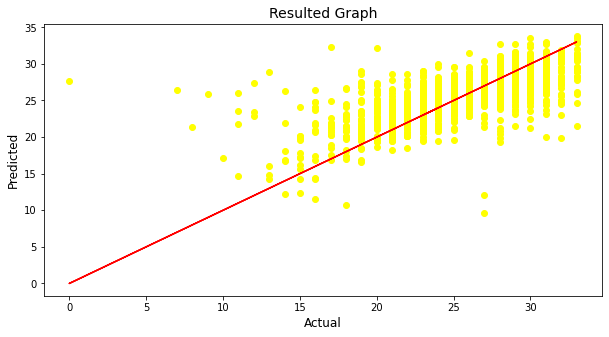

In [74]:
# Final output Graph

plt.figure(figsize=(10,5))
plt.scatter(x=y_test,y=prid,color='Yellow')
plt.plot(y_test,y_test,color='Red')
plt.xlabel('Actual',fontsize=12)
plt.ylabel('Predicted',fontsize=12)
plt.title('Resulted Graph',fontsize=14)
plt.show()

# Saving Model

In [75]:
import joblib

joblib.dump(GB_mod,'CPP.pkl')

['CPP.pkl']

# Conclusion

**loading model**

In [77]:
GB_mod=joblib.load('CPP.pkl','r+')
Pretd=GB_mod.predict(X_test)
Pretd

array([23.5630081 , 20.06619076, 11.50502374, ..., 22.53660457,
       30.7725304 , 21.84173195])

In [78]:
Finalgb=np.array(y_test)
Finalgb

array([24., 19., 16., ..., 24., 29., 23.])

In [79]:
predt=np.array(GB_mod.predict(X_test))
predt

array([23.5630081 , 20.06619076, 11.50502374, ..., 22.53660457,
       30.7725304 , 21.84173195])

In [80]:
gb_pred=pd.DataFrame({'Original':Finalgb,'Predicted':predt},index=range(len(Finalgb)))
gb_pred

Original  Predicted
0         24.0  23.563008
1         19.0  20.066191
2         16.0  11.505024
3         29.0  29.247058
4         19.0  21.124528
...        ...        ...
1543      28.0  26.299105
1544      29.0  27.461879
1545      24.0  22.536605
1546      29.0  30.772530
1547      23.0  21.841732

[1548 rows x 2 columns]

# Thanks